<a href="https://colab.research.google.com/github/srishtisinghhh/SurvivalPrediction/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DATA COLLECTION AND PREPROCESSING

In [3]:
df=pd.read_csv('/content/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

Handling missing values filling it using mean or mode

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'],inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#finding no of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data visualisation

In [12]:
sns.set()

<ipython-input-13-b0d844bc9fda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=custom_palette)
<ipython-input-13-b0d844bc9fda>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Survived', data=df, palette=custom_palette)


<Axes: xlabel='Survived', ylabel='count'>

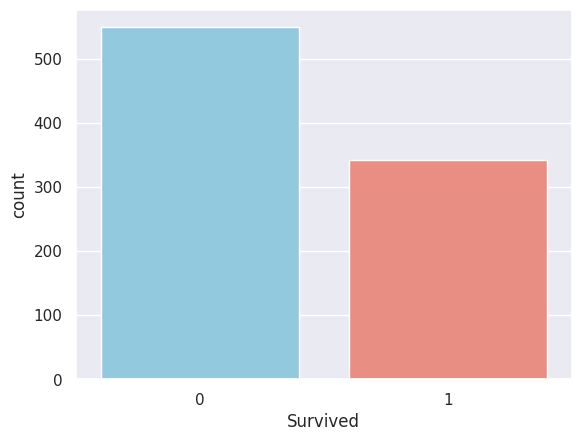

In [13]:
#making count plot for survived
custom_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']
sns.countplot(x='Survived', data=df, palette=custom_palette)


<ipython-input-14-6ed660f51f12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df,palette=custom_palette)
<ipython-input-14-6ed660f51f12>:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Sex',data=df,palette=custom_palette)


<Axes: xlabel='Sex', ylabel='count'>

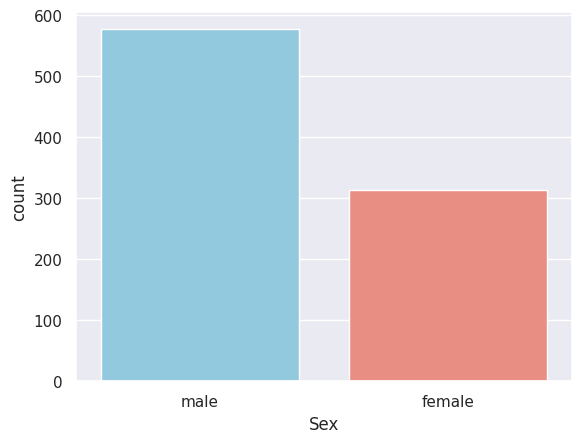

In [14]:
#making count plot for gender
sns.countplot(x='Sex',data=df,palette=custom_palette)

<ipython-input-15-940e81bccc3f>:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Pclass',data=df,hue='Survived',palette=custom_palette)


<Axes: xlabel='Pclass', ylabel='count'>

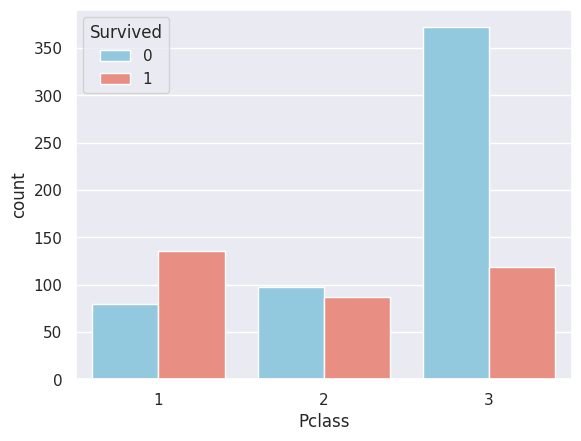

In [15]:
#survival rate by passenger class
sns.countplot(x='Pclass',data=df,hue='Survived',palette=custom_palette)

<ipython-input-16-251a141748ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass',y='Survived',data=df,palette=custom_palette)
<ipython-input-16-251a141748ff>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='Pclass',y='Survived',data=df,palette=custom_palette)


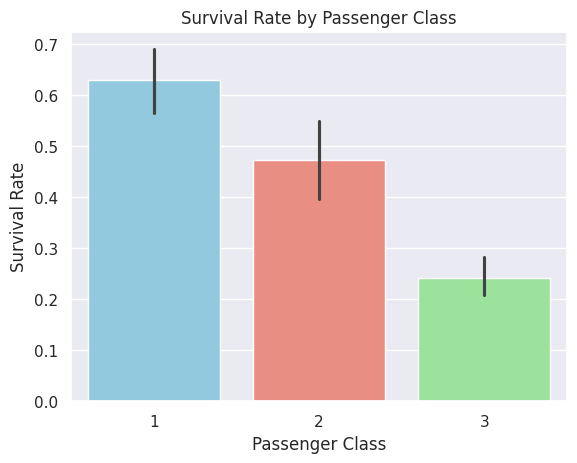

In [16]:
#barplot
custom_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']
sns.barplot(x='Pclass',y='Survived',data=df,palette=custom_palette)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

<ipython-input-17-fae5df4de8a1>:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Sex',data=df,hue='Survived',palette=custom_palette)


<Axes: xlabel='Sex', ylabel='count'>

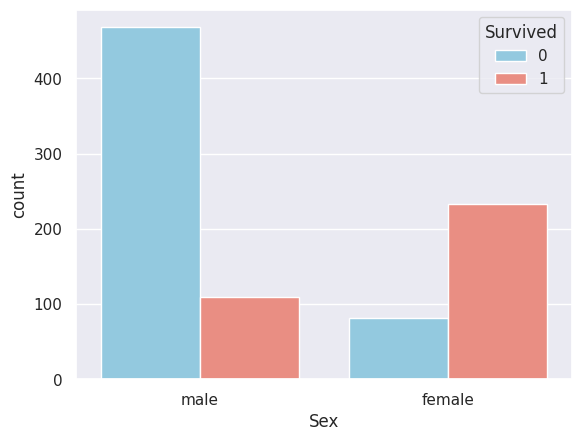

In [17]:
sns.countplot(x='Sex',data=df,hue='Survived',palette=custom_palette)

<ipython-input-18-d0e11cac69de>:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Pclass', hue='Survived', palette=custom_palette, data=df)


<Axes: xlabel='Pclass', ylabel='count'>

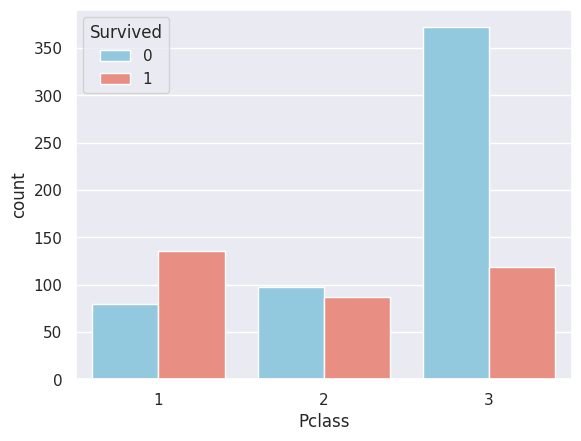

In [18]:
sns.countplot(x='Pclass', hue='Survived', palette=custom_palette, data=df)


<ipython-input-19-bdd6f3de73f6>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Age',data=df,palette=custom_palette,kde=True)


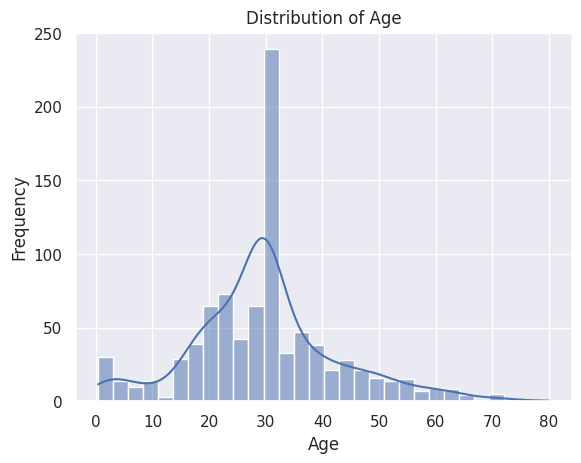

In [19]:
sns.histplot(x='Age',data=df,palette=custom_palette,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

<ipython-input-20-e4b2efd0cd74>:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(x='Age',hue='Survived',data=df,palette=custom_palette,kde=True)


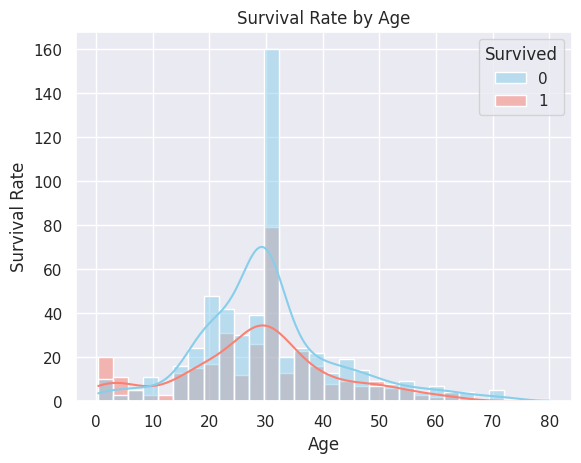

In [20]:
#survival rate by age
sns.histplot(x='Age',hue='Survived',data=df,palette=custom_palette,kde=True)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.show()

<ipython-input-21-55d3fb431db2>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Fare',data=df,palette=custom_palette,kde=True)


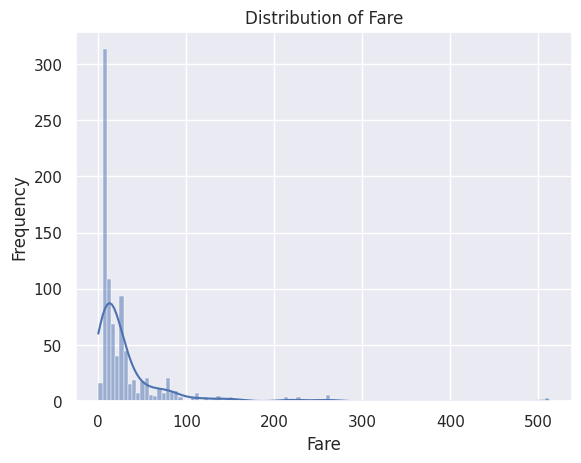

In [21]:
#fare distribution
sns.histplot(x='Fare',data=df,palette=custom_palette,kde=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

In [22]:
df['Sex'].replace({'male':0,'female':1},inplace=True)
df['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [24]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [25]:
df['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

Separating features and targets

In [26]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X_train,X_test, Y_train,Y_test)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
30        1    0  40.000000      0      0   27.7208         1
10        3    1   4.000000      1      1   16.7000         0
873       3    0  47.000000      0      0    9.0000         0
182       3    0   9.000000      4      2   31.3875         0
876       3    0  20.000000      0      0    9.8458         0
..      ...  ...        ...    ...    ...       ...       ...
534       3    1  30.000000      0      0    8.6625         0
584       3    0  29.699118      0      0    8.7125         1
493       1    0  71.000000      0      0   49.5042         1
527       1    0  29.699118      0      0  221.7792         0
168       1    0  29.699118      0      0   25.9250         0

[712 rows x 7 columns]      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
707       1    0  42.000000      0      0  26.2875         0
37        3    0  21.000000      0      0   8.0500         0
615       2    1  24.000000      1      2  65.000

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [30]:
print(Y.shape, Y_train.shape,Y_test.shape)

(891,) (712,) (179,)


Model training(Logistic Regression)

In [31]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [32]:
lr.predict(X_train)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [33]:
data_accuracy=accuracy_score(Y_train,lr.predict(X_train))
print('Accuracy score of training data:',data_accuracy)

Accuracy score of training data: 0.8075842696629213


In [34]:
lr.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [35]:
data_accuracy=accuracy_score(Y_test,lr.predict(X_test))
print('Accuracy score of test data:',data_accuracy)

Accuracy score of test data: 0.7821229050279329


In [36]:
import joblib
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [37]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrog with authtoken
ngrok.set_auth_token("2iBn5mJ0PprPGKrrAue5YUanywS_4ZdHGxT2LrtmLp7oHPHi6")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#retrieve ngrok public url
public_url=ngrok.connect(addr='5000',proto="http")
print(public_url)



NgrokTunnel: "https://8f3e-35-199-188-165.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    html_form = """
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Titanic Prediction</title>
        <style>
            body {
                background-color: purple;
                color: white;
                font-family: Arial, sans-serif;
                text-align: center;
                padding: 20px;
            }
            #prediction-form {
                display: inline-block;
                text-align: left;
            }
            img {
                max-width: 100%;
                height: auto;
            }
        </style>
    </head>
    <body>
        <h2>Titanic Prediction</h2>
        <form id="prediction-form" method="POST" action="/predict">
            <label for="pclass">Passenger Class:</label>
            <input type="text" id="pclass" name="pclass"><br><br>

            <label for="sex">Sex (0 for male, 1 for female):</label>
            <input type="text" id="sex" name="sex"><br><br>

            <label for="age">Age:</label>
            <input type="number" id="age" name="age"><br><br>

            <label for="sibsp">Siblings/Spouses:</label>
            <input type="number" id="sibsp" name="sibsp"><br><br>

            <label for="parch">Parents/Children:</label>
            <input type="number" id="parch" name="parch"><br><br>

            <label for="fare">Fare:</label>
            <input type="number" id="fare" name="fare"><br><br>

            <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
            <input type="text" id="embarked" name="embarked"><br><br>

            <button type="button" onclick="predictSurvival()">Predict</button>
        </form>

        <p id="prediction-result"></p>

        <img src="https://media.istockphoto.com/id/503132519/photo/titanic-and-iceberg.jpg?s=612x612&w=0&k=20&c=cO71OMKsceiSj07heG1jhOiNRNGevD-XrACWis2RdQ4=" alt="Titanic">
        <script>
            function predictSurvival() {
                var xhr = new XMLHttpRequest();
                var url = "/predict";
                var data = new FormData(document.getElementById("prediction-form"));

                xhr.open("POST", url, true);
                xhr.onreadystatechange = function () {
                    if (xhr.readyState === 4 && xhr.status === 200) {
                        var response = JSON.parse(xhr.responseText);
                        document.getElementById("prediction-result").innerHTML = "Titanic Survival Prediction: " + response.prediction;
                    }
                };
                xhr.send(data);
            }
        </script>
    </body>
    </html>
    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run():
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

public_url = ngrok.connect(addr='5000', proto="http")
print("Public URL:", public_url)

display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    run()
except KeyboardInterrupt:
    ngrok.kill()









Public URL: NgrokTunnel: "https://e3e8-35-199-188-165.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [21/Jun/2024 15:25:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [21/Jun/2024 15:25:47] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [21/Jun/2024 15:26:05] "POST /predict HTTP/1.1" 200 -
